In [1]:
# Assorted stats functions:
# 1) One-way ANOVA
# 2) Two sample proportions z test
# 3) Chi-square (2x2 + multiple)
# 4) Pandas summary_cat + crosstab
# 5) Bayes theorem
# 6) Moving average
# 7) Beta distribution
# 8) Pandas indexing + slicing
# 9) Time series indexing
# 10) Ploting a manual normal distribution
# 11) Numpy random numbers/lists
# 12) Pandas categorical type
# 13) Tuples, pivot tables
# 14) Plotting random walks
# 15) xkcd plots!
# 16) Assorted matplotlib plots
# 17) Diagonal matrices, numpy linspace
# 18) Check for missing values in a data frame
# 19) Birthday paradox

%matplotlib inline

In [2]:
# 1) How to do a one-way ANOVA
import scipy.stats as stats

tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)

F_onewayResult(statistic=7.121019471642447, pvalue=0.0002812242314534544)

In [3]:
# 2) Two sample proportions z test
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

smb = np.array([36,60])
traffic = np.array([4203,4478])
stat, pval = proportions_ztest(smb, traffic)
pval

0.03138843833320864

In [4]:
stat

-2.152113218103622

In [5]:
# 3) Chi square (returns same result as two sample proportions z test for 2x2)
from statsmodels.stats.proportion import proportions_chisquare

stat, pval, table = proportions_chisquare(smb, traffic)
pval

0.031388438333208604

In [6]:
# Chi square for multiple proportions (e.g. A/B/C test)
conversions = np.array([407,429,363])
traffic = np.array([25803,25691,25494])
groups = np.array(['2 step','3 step','1 step'])
stat, pval, table = proportions_chisquare(conversions, traffic)
table

(array([[  407, 25396],
        [  429, 25262],
        [  363, 25131]]), array([[  401.85219775, 25401.14780225],
        [  400.10792591, 25290.89207409],
        [  397.03987634, 25096.96012366]]))

In [7]:
pval

0.07612108847127831

In [8]:
# Now do post-hoc tests to determine *which* value(s) are statistically significant when compared to the rest
results = []
for n in range(0,len(conversions)):
    observations = [conversions[n], sum(conversions[:n]) + sum(conversions[n+1:])]
    sample = [traffic[n], sum(traffic[:n]) + sum(traffic[n+1:])]
    stat, pval, table = proportions_chisquare(observations, sample)
    results.append(pval)
    print(pval)

0.7509232754841703
0.07451096280195875
0.035265811599596714


In [9]:
# Instead of comparing these p-values to 0.05, correct to allow for chance by dividing by the number of comparisons
bonferroni = 0.05/len(results)
bonferroni

0.016666666666666666

In [10]:
significants = [result < bonferroni for result in results]
significants

[False, False, False]

In [11]:
# Now repeat the above, except comparing each combination of individual proportions this time
results = []
for n in range(0,len(conversions)):
    for m in range(n+1, len(conversions)):
        observations = [conversions[n], conversions[m]]
        sample = [traffic[n], traffic[m]]
        stat, pval, table = proportions_chisquare(observations, sample)
        results.append(pval)
        print("({}, {}): {}".format(groups[n], groups[m], pval))
bonferroni = 0.05/len(results)
print("bonferroni = {}".format(bonferroni))
significants = [result < bonferroni for result in results]
print(significants)

(2 step, 3 step): 0.4062307824572483
(2 step, 1 step): 0.15292049825345072
(3 step, 1 step): 0.024169776849748737
bonferroni = 0.016666666666666666
[False, False, False]


In [12]:
# 4) Playing around with rp.summary_cat and pd.crosstab
import pandas as pd
df = pd.DataFrame(np.random.randint(2, size= (101, 3)),
                  columns= ['disease', 'treatment', 'survived'])
df.head()

,disease,treatment,survived
0,0,0,0
1,1,0,0
2,0,1,1
3,1,0,0
4,0,1,0


In [13]:
!pip install researchpy

In [14]:
import researchpy as rp
rp.summary_cat(df[['disease', 'treatment', 'survived']])

,Variable,Outcome,Count,Percent
0,disease,0,53,52.48
1,,1,48,47.52
2,treatment,1,57,56.44
3,,0,44,43.56
4,survived,1,52,51.49
5,,0,49,48.51


In [15]:
pd.crosstab([df['disease'], df['treatment']], df['survived'])

survived            0   1
disease treatment        
0       0           8  15
        1          15  15
1       0          14   7
        1          12  15

In [16]:
# 5) Bayes theorem
# "A gambler mixed a "cheat" die with all sixes into a box of eight normal dice. She chooses one at random, 
# rolls it twice, and gets six both times. What is the probability that she chose the "cheat" die?"
# p_h = 1/9
# p_not_h = 8/9
# p_e_bar_h = 1
# p_e_bar_not_h = 1/36

#https://anesi.com/bayes.htm
p_h = .15
p_not_h = .85
p_e_bar_h = .8
p_e_bar_not_h = .2

In [17]:
p_e_bar_h * p_h / (p_e_bar_h * p_h + p_e_bar_not_h * p_not_h)

0.4137931034482758

In [18]:
# 6) Moving average
import pandas as pd

numbers = pd.DataFrame(columns=["foo","bar"],data=[[1,3],[2,7],[3,9],[4,11],[5,60]])
ma = numbers.rolling(3, on='foo').std()
numbers

,foo,bar
0,1,3
1,2,7
2,3,9
3,4,11
4,5,60


In [19]:
ma

,foo,bar
0,1,NaN
1,2,NaN
2,3,3.055050
3,4,2.000000
4,5,28.884829


In [20]:
# 7) Beta distribution
# https://www.countbayesie.com/blog/2015/3/17/interrogating-probability-distributions
from scipy.special import btdtr,btdtri
btdtr(11,19,0.5)

0.9319770261645317

In [21]:
btdtri(11,19,0.9319770261645317)

0.5

In [22]:
btdtri(622,651,0.975)

0.5160706153018945

In [23]:
btdtr(11,19,0.5)-btdtr(11,19,0.2)

0.9122725863214266

In [24]:
# http://varianceexplained.org/statistics/beta_distribution_and_baseball/
btdtri(81,219,0.5)

0.26948831788579786

In [25]:
# https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function
btdtr(300,39700,1)-btdtr(300,39700,0.0085)

0.01248151030012834

In [26]:
btdtri(300,39700,0.1)

0.006952699764581994

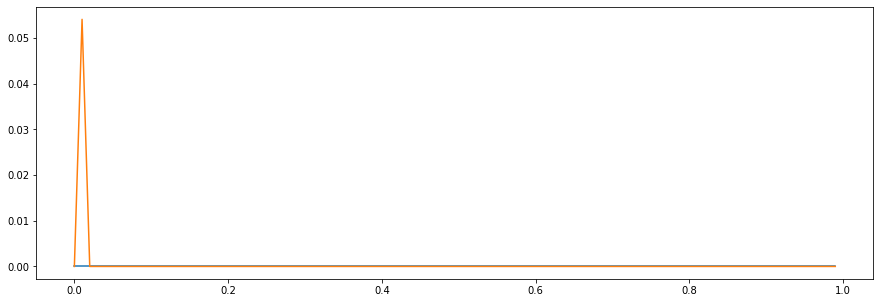

In [27]:
# https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-adding-bayesian-priors
# http://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution/47782#47782
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5))
a =  133
b = 49259-a
x = np.arange(0.00, 1, 0.01)
y = beta.pdf(x,a,b)
plt.plot(x,y)
a2 =  399
b2 = 49259-a2
y2 = beta.pdf(x,a2,b2)
plt.plot(x,y2)

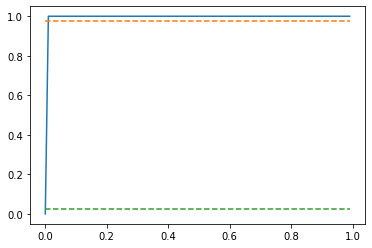

In [28]:
y = beta.cdf(x,a,b)
plt.plot(x,y)
upper_bound = np.full((100,1),0.975)
lower_bound = np.full((100,1),0.025)
plt.plot(x,upper_bound,linestyle='dashed')
plt.plot(x,lower_bound,linestyle='dashed')

In [29]:
# 8) Pandas indexing + slicing
import pandas as pd
l1 = [1,1,1]
l2 = ['a','a','b']
l3 = [0,9,8]
a = pd.DataFrame()
a['l1'] = l1
a['l2'] = l2
a['l4'] = l3
a.set_index('l2',inplace=True)
a

,l1,l4
l2,,
a,1,0
a,1,9
b,1,8


In [30]:
a.index.duplicated()

array([False,  True, False])

In [31]:
# How to slice by index (row) and column at the same time
a.loc[a.index=='a',['l1','l4']]

,l1,l4
l2,,
a,1,0
a,1,9


In [32]:
# 9) Time series indexing
# Create a date range, a 2d array, a list from a string, and bundle all of these into a data frame
dates = pd.date_range('20130101', periods=6)
array = np.random.randn(6, 4)
df = pd.DataFrame(array, index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.615106,-1.800160,-1.341939,-0.880899
2013-01-02,-0.720576,0.319607,-0.396350,-0.595429
2013-01-03,1.058334,-0.696447,-1.017298,0.614211
2013-01-04,-0.298454,-1.293276,-0.425083,-0.218095
2013-01-05,0.625372,0.332981,-0.405736,-0.692614
2013-01-06,0.700298,-0.836826,-1.057017,0.257594


In [33]:
# Set value in df by label, position
df.at[dates[0], 'A'] = 999
df.iat[5, 3] = -999
df

,A,B,C,D
2013-01-01,999.000000,-1.800160,-1.341939,-0.880899
2013-01-02,-0.720576,0.319607,-0.396350,-0.595429
2013-01-03,1.058334,-0.696447,-1.017298,0.614211
2013-01-04,-0.298454,-1.293276,-0.425083,-0.218095
2013-01-05,0.625372,0.332981,-0.405736,-0.692614
2013-01-06,0.700298,-0.836826,-1.057017,-999.000000


In [34]:
# Use .loc to slice rows and subset columns
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.720576,0.319607
2013-01-03,1.058334,-0.696447
2013-01-04,-0.298454,-1.293276


In [35]:
# And show can change the dataframe back to an array
np.array_equal(array,df.to_numpy())

True

In [36]:
# Describe, copy, add index
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,166.727496,-0.662354,-0.773904,-166.795471
std,407.729141,0.857812,0.415170,407.695636
min,-0.720576,-1.800160,-1.341939,-999.000000
25%,-0.067498,-1.179163,-1.047087,-0.833828
50%,0.662835,-0.766637,-0.721191,-0.644021
75%,0.968825,0.065594,-0.410573,-0.312429
max,999.000000,0.332981,-0.396350,0.614211


In [37]:
df_copy = df.copy()
df_copy[df_copy > 0] = -df_copy
df_copy

,A,B,C,D
2013-01-01,-999.000000,-1.800160,-1.341939,-0.880899
2013-01-02,-0.720576,-0.319607,-0.396350,-0.595429
2013-01-03,-1.058334,-0.696447,-1.017298,-0.614211
2013-01-04,-0.298454,-1.293276,-0.425083,-0.218095
2013-01-05,-0.625372,-0.332981,-0.405736,-0.692614
2013-01-06,-0.700298,-0.836826,-1.057017,-999.000000


In [38]:
s = pd.Series([1] * len(df), index=dates)
df.add(s, axis='index')

,A,B,C,D
2013-01-01,1000.000000,-0.800160,-0.341939,0.119101
2013-01-02,0.279424,1.319607,0.603650,0.404571
2013-01-03,2.058334,0.303553,-0.017298,1.614211
2013-01-04,0.701546,-0.293276,0.574917,0.781905
2013-01-05,1.625372,1.332981,0.594264,0.307386
2013-01-06,1.700298,0.163174,-0.057017,-998.000000


In [39]:
df['E'] = np.cumsum(df['D'])
df

,A,B,C,D,E
2013-01-01,999.000000,-1.800160,-1.341939,-0.880899,-0.880899
2013-01-02,-0.720576,0.319607,-0.396350,-0.595429,-1.476328
2013-01-03,1.058334,-0.696447,-1.017298,0.614211,-0.862117
2013-01-04,-0.298454,-1.293276,-0.425083,-0.218095,-1.080213
2013-01-05,0.625372,0.332981,-0.405736,-0.692614,-1.772827
2013-01-06,0.700298,-0.836826,-1.057017,-999.000000,-1000.772827


In [40]:
# More spliting, concatenating
pieces = [df[:2],df[2:]]
pieces

[                     A         B         C         D         E
 2013-01-01  999.000000 -1.800160 -1.341939 -0.880899 -0.880899
 2013-01-02   -0.720576  0.319607 -0.396350 -0.595429 -1.476328,
                    A         B         C           D            E
 2013-01-03  1.058334 -0.696447 -1.017298    0.614211    -0.862117
 2013-01-04 -0.298454 -1.293276 -0.425083   -0.218095    -1.080213
 2013-01-05  0.625372  0.332981 -0.405736   -0.692614    -1.772827
 2013-01-06  0.700298 -0.836826 -1.057017 -999.000000 -1000.772827]

In [41]:
pd.concat(pieces)

,A,B,C,D,E
2013-01-01,999.000000,-1.800160,-1.341939,-0.880899,-0.880899
2013-01-02,-0.720576,0.319607,-0.396350,-0.595429,-1.476328
2013-01-03,1.058334,-0.696447,-1.017298,0.614211,-0.862117
2013-01-04,-0.298454,-1.293276,-0.425083,-0.218095,-1.080213
2013-01-05,0.625372,0.332981,-0.405736,-0.692614,-1.772827
2013-01-06,0.700298,-0.836826,-1.057017,-999.000000,-1000.772827


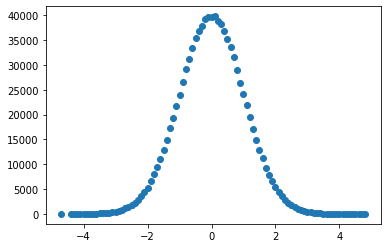

In [42]:
# 10) Ploting a manual normal distribution
# Make an numpy array using a normal distribution, round to 1dp
# Then plot frequencies using a data frame and matplotlib
ser = pd.Series(np.random.randn(1000000))
ser = np.round(ser,1)
vals = pd.DataFrame(ser.value_counts(), columns=["numbers"])
plt.scatter(vals.index, vals['numbers'])

In [43]:
vals.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 94 entries, 0.1 to 4.5
Data columns (total 1 columns):
numbers    94 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


In [44]:
vals.T

,0.1,-0.0,-0.1,-0.2,0.2,0.3,-0.3,0.4,-0.4,-0.5,...,-4.1,-4.3,-4.4,4.3,4.6,4.4,4.8,-4.7,4.7,4.5
numbers,39798,39610,39553,39259,38799,38300,37819,36850,36786,35405,...,7,6,5,4,3,3,2,2,2,1


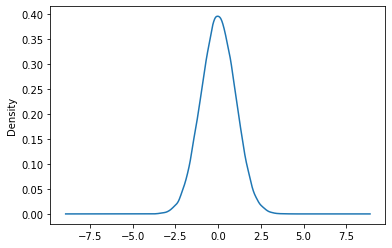

In [45]:
ser = pd.Series(np.random.randn(100000))

ser.plot.kde()

In [46]:
# 11) Numpy random numbers/lists
np.random.randn(5)

array([ 0.14486041, -1.76874092, -0.67600908, -0.06487239,  0.05396454])

In [47]:
np.random.randn(5,1)

array([[ 0.89236439],
       [-0.87190458],
       [ 0.01552626],
       [-1.69556813],
       [ 1.18579084]])

In [48]:
# 12) Pandas categorical type
pd.Categorical(["test", "train", "test", "train"])

[test, train, test, train]
Categories (2, object): [test, train]

In [49]:
# 13) Tuples, pivot tables
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [50]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [51]:
df3 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df3

A         B
first second                    
bar   one    -0.910410  0.991803
      two     0.750914 -1.134105
baz   one    -0.999499 -1.099899
      two    -0.353068  1.102704
foo   one     1.499265  1.923522
      two    -0.509760  1.019379
qux   one     0.072208  0.967147
      two    -1.943980  0.160991

In [52]:
df3.stack()

first  second   
bar    one     A   -0.910410
               B    0.991803
       two     A    0.750914
               B   -1.134105
baz    one     A   -0.999499
               B   -1.099899
       two     A   -0.353068
               B    1.102704
foo    one     A    1.499265
               B    1.923522
       two     A   -0.509760
               B    1.019379
qux    one     A    0.072208
               B    0.967147
       two     A   -1.943980
               B    0.160991
dtype: float64

In [53]:
df3.unstack()

A                   B          
second       one       two       one       two
first                                         
bar    -0.910410  0.750914  0.991803 -1.134105
baz    -0.999499 -0.353068 -1.099899  1.102704
foo     1.499265 -0.509760  1.923522  1.019379
qux     0.072208 -1.943980  0.967147  0.160991

In [54]:
df4 = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'foo', 'foo', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df4

,A,B,C,D,E
0,one,A,foo,-0.936647,-0.754403
1,one,B,foo,0.263917,0.304491
2,two,C,foo,1.644249,0.489921
3,three,A,foo,0.355768,-0.803601
4,one,B,foo,-0.063028,-2.951043
5,one,C,bar,-0.055007,-1.228278
6,two,A,foo,0.761026,0.677991
7,three,B,foo,1.212867,2.430371
8,one,C,foo,-1.408104,1.184192
9,one,A,foo,0.471085,1.638082


In [55]:
pd.pivot_table(df4, values='D',index=['A','B'],columns=['C'], aggfunc=np.sum)

C             bar       foo
A     B                    
one   A       NaN -0.465562
      B       NaN  0.200889
      C -0.055007 -1.408104
three A       NaN  0.355768
      B       NaN  1.212867
      C -1.757479       NaN
two   A       NaN  0.761026
      B       NaN -1.261728
      C       NaN  1.644249

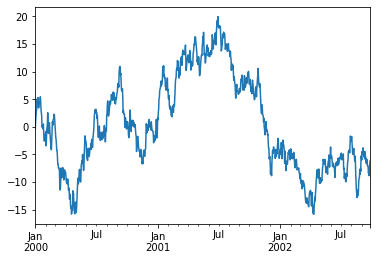

In [56]:
# 14) Plotting random walks
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
 
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

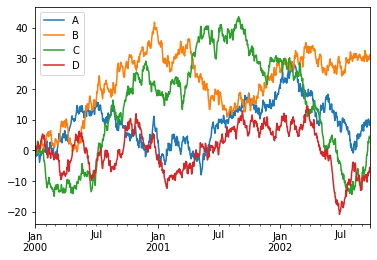

In [57]:
df5 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
df5 = df5.cumsum()
plt.figure()
df5.plot()
plt.legend(loc='best')

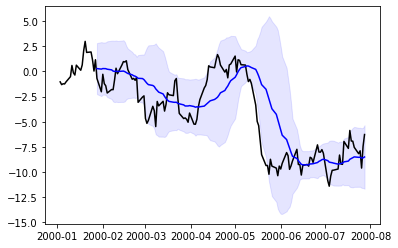

In [58]:
price = pd.Series(np.random.randn(150).cumsum(),
                   index=pd.date_range('2000-1-1', periods=150, freq='B'))
 

ma = price.rolling(20).mean()

mstd = price.rolling(20).std()

plt.figure()

plt.plot(price.index, price, 'k')

plt.plot(ma.index, ma, 'b')

plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd,
                  color='b', alpha=0.1)

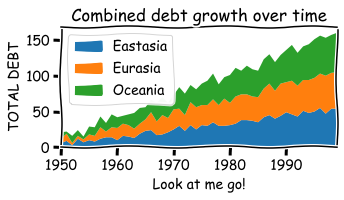

In [59]:
# 15) xkcd plots! 

plt.xkcd()
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('TOTAL DEBT')
ax.set_xlabel('Look at me go!')
ax.set_xlim(left=yrs[0], right=yrs[-1])
fig.tight_layout()

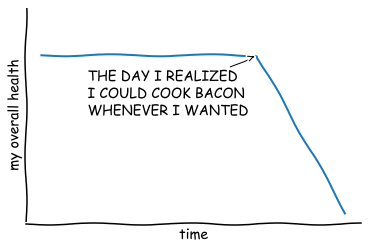

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-30, 10])

data = np.ones(100)
data[70:] -= np.arange(30)

plt.annotate(
    'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
    xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

plt.plot(data)

plt.xlabel('time')
plt.ylabel('my overall health')
plt.rcdefaults()

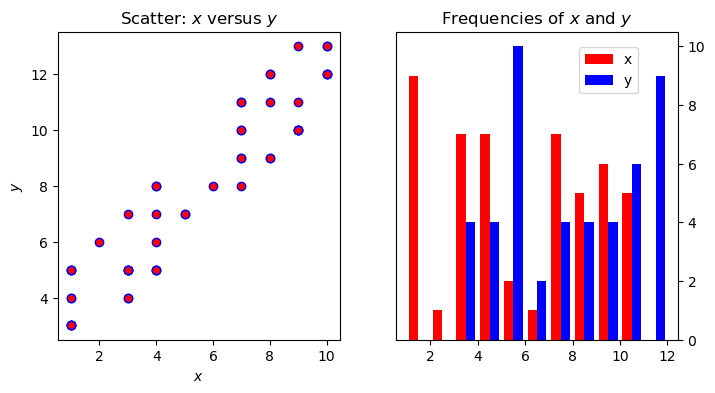

In [61]:
# 16) Assorted matplotlib plots

np.random.seed(444)
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                                figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
          label=('x', 'y'),color=('red','blue'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

In [62]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

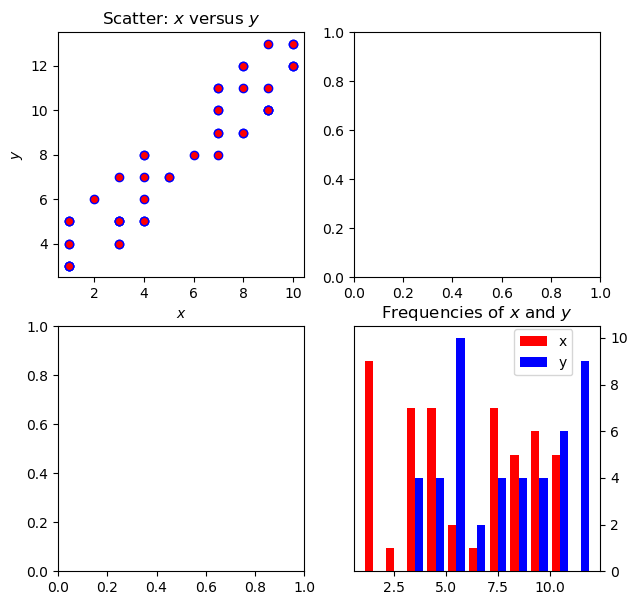

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax4.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'),color=('red','blue'))
ax4.legend(loc=(0.65, 0.8))
ax4.set_title('Frequencies of $x$ and $y$')
ax4.yaxis.tick_right()

In [64]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
     housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

In [65]:
def add_titlebox(ax, text):
     ax.text(.55, .8, text,
         horizontalalignment='center',
        transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.6),
         fontsize=12.5)
     return ax

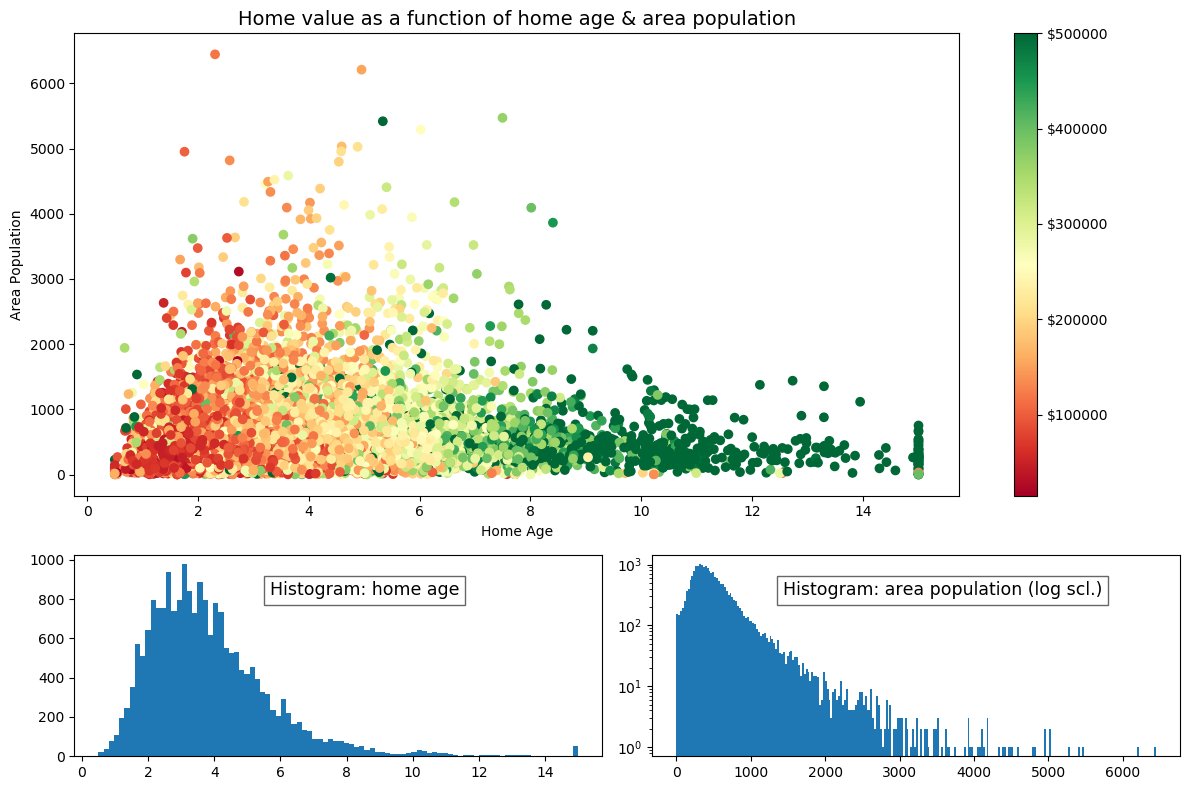

In [66]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
               fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
#ax1.set_yscale('log')
ax1.set_ylabel("Area Population")
ax1.set_xlabel("Home Age")
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')
fig.tight_layout()

In [67]:
# 17) Diagonal matrices, numpy linspace
x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0, 11],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0, 11]])

In [68]:
np.diag_indices_from(x[::-1])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [69]:
np.linspace(0, 10, 101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [70]:
# 18) Check for missing values in a data frame
df.apply(lambda x: sum(x.isnull()), axis=0)

A    0
B    0
C    0
D    0
E    0
dtype: int64

In [71]:
# 19) Birthday paradox
p = 5/34 * 4/33 * 3/32 * 2/31 * 1/30
p

3.5938128917256053e-06

In [72]:
perm = (21*20)/2
perm

210.0

In [73]:
1/(1-(1-p)**perm)

1325.5262533678433